# Chapitre 3 : Algorithmes de recherche

On a souvent besoin de rechercher un élément ou sa position
dans un tableau.
La plupart des algorithmes de recherche efficaces sont basés sur
une organisation astucieuse des données.
Par exemple, pour retrouver une
carte dans un jeu, il est très utile que le jeu soit trié.

## Recherche séquentielle

La méthode de recherche la plus simple est la recherche séquentielle
qui consiste à examiner les éléments l'un après l'autre.
Elle s'effectue en temps linéaire en la taille du tableau dans le pire cas.
Elle ne nécessite pas d'avoir une structure de données triée.
La fonction `recherche_seq` ci-dessous recherche de manière séquentielle si le tableau `tab` contient
la valeur `element`.

In [ ]:
def recherche_seq(element, tab):
    """Retourne l'indice de la première occurence de element dans tab et 
       -1 si element n'est pas dans tab."""
    i = 0
    while i < len(tab) and tab[i] != element:
        i += 1
    if i == len(tab):
        return -1  # en cas d'échec de la recherche
    else:
        return i


nombres = [15, 21, 32, 36, 42, 45, 59, 62, 84, 87, 981]
nb = 62
resultat = recherche_seq(nb, nombres)
if resultat == -1:
    print("le nombre", nb, "n'est pas dans le tableau")
else:
    print("le nombre", nb, "se trouve à l'indice", resultat)

Sur ce thème : **Exercices 1 et 2, TD 3.**

## Dichotomie 

Si le tableau est trié, la recherche dichotomique permet une recherche plus rapide. 

**Idée générale**

Soit `tab` un tableau trié et `i` un indice.

- Si `element < tab[i]` alors tous les éléments "à droite" de
`tab[i]` (d'indice supérieur à `i`) sont supérieurs à `element`,
et il faut continuer la recherche dans la moitié gauche du tableau,
- si `element > tab[i]` alors tous les éléments "à gauche" de `tab[i]` (d'indice inférieur à `i`) sont inférieurs à `element`,
et il faut continuer la recherche dans la moitié droite du tableau.

En utilisant cette remarque, à chaque itération, on divise par 2 la taille de la partie du tableau dans laquelle chercher `element` en comparant le contenu de la case médiane avec `element`.

In [ ]:
def recherche_dt(element, tab):
    debut = 0
    fin = len(tab) - 1
    while debut <= fin:
        milieu = (debut + fin) // 2

        if element == tab[milieu]:  # on a trouvé l'élément
            return milieu
        elif element < tab[milieu]:
            fin = milieu - 1  # on prend la moitié gauche
        else:
            debut = milieu + 1  # on prend la moitié droite
    return -1


nombres = [15, 21, 32, 36, 42, 45, 59, 62, 84, 87, 981]
# le tableau est trié donc on peut faire une dichotomie
nb = 59  # essayer avec 87 et 42
resultat = recherche_dt(nb, nombres)
if resultat == -1:
    print("le nombre", nb, "n'est pas dans le tableau")
else:
    print("le nombre", nb, "se trouve à l'indice", resultat)

- La complexité est logarithmique dans le pire des cas : log$_2(n)$.
- La recherche dichotomique est plus rapide que la recherche séquentielle en général (complexité en moyenne et dans le pire des cas) mais dans certains cas, la recherche séquentielle peut être plus rapide : si les tableaux sont de petite taille, ou si la valeur à chercher se trouve en début de tableau (exemple rechercher 15 dans le tableau `nombres`)

## Courbes de complexité

In [ ]:
from matplotlib.pyplot import plot, figure, legend, xlabel, ylabel
from time import time
from random import randint

In [ ]:
def cree_tab(n):
    """Retourne le tableau [0, 1, ..., n-1]"""
    t = []
    i = 0
    while i < n:
        t.append(i)
        i += 1
    return t


def mesure_temps_recherche(n, nb_mesures):
    """Retourne le temps moyen (sur nb_mesures) d'une recherche d'un élément 
    dans un tableau trié. Le tableau retourné contient le temps pour une 
    recherche séquentielle (indice 0) puis dichotomique (indice1)."""
    tps = [0., 0.]
    tableau = cree_tab(n)
    i = 0
    while i < nb_mesures:
        element = n

        # Recherche séquentielle
        tic = time()
        res = recherche_seq(element, tableau)
        tps[0] += time() - tic

        # Recherche dichotomique
        tic = time()
        res = recherche_dt(element, tableau)
        tps[1] += time() - tic

        i += 1

    tps[0] = round(1000 * tps[0] / nb_mesures, 6)
    tps[1] = round(1000 * tps[1] / nb_mesures, 6)
    return tps


# Mesures des temps :
# - temps_seq[i] contient le temps moyen de recherche séquentielle pour un tableau de taille tailles[i]
# - temps_dt[i] contient le temps moyen de recherche dichotomique pour un tableau de taille tailles[i]
nb_mesures = 20
tailles = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
temps_seq = []
temps_dt = []
i = 0
while i < len(tailles):
    tps = mesure_temps_recherche(tailles[i], nb_mesures)
    temps_seq.append(tps[0])
    temps_dt.append(tps[1])
    i += 1

In [ ]:
print("Temps moyen de recherche :")
i = 0
while i < len(tailles):
    print("Pour un tableau de taille ", tailles[i], ":")
    print("\t", temps_seq[i], "ms pour la recherche séquentielle")
    print("\t", temps_dt[i], "ms pour la recherche dichotomique")
    i += 1

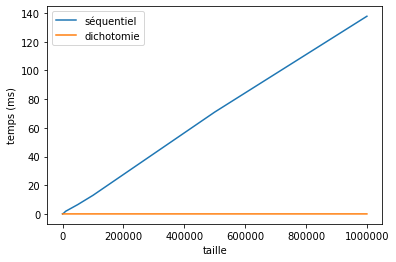

In [ ]:
%matplotlib inline

plot(tailles, temps_seq, label="séquentiel")
plot(tailles, temps_dt, label="dichotomie")
xlabel("taille")
ylabel("temps (ms)")
legend()

Sur ce thème : **Exercices 3 et 4, TD 3.**